In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import keras
from sklearn.preprocessing import StandardScaler , LabelEncoder
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Dropout

***LOADING DATASET***

In [ ]:
train_path = 'train.csv'
test_path = 'test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:
train.head(10)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0
5,1,0.00,4,0.0,0,81,1,0,344,669987,150,0
6,1,0.00,2,0.0,0,50,0,0,16,122,177,0
7,1,0.00,2,0.0,0,0,0,0,33,1078,76,0
8,1,0.00,0,0.0,0,71,0,0,72,1824,2713,0
9,1,0.00,2,0.0,0,40,1,0,213,12945,813,0


In [ ]:
train.tail(10)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
566,1,0.27,1,0.00,0,19,0,0,8,126,860,1
567,1,0.25,1,0.00,0,0,0,1,102,39,229,1
568,1,0.43,1,0.00,0,5,0,0,6,66,161,1
569,1,0.31,3,0.00,0,0,0,0,25,87,698,1
570,1,0.20,1,0.00,0,28,0,0,0,15,64,1
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [ ]:
train.iloc[:]

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


***MAIN MODEL***

Logistic Regression Confusion Matrix:
 [[54  6]
 [10 50]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        60
           1       0.89      0.83      0.86        60

    accuracy                           0.87       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.87      0.87       120



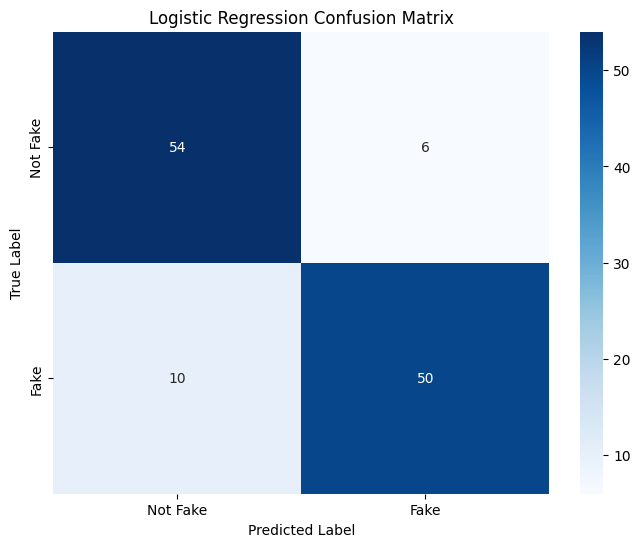


K-Nearest Neighbors Confusion Matrix:
 [[55  5]
 [ 5 55]]
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        60
           1       0.92      0.92      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



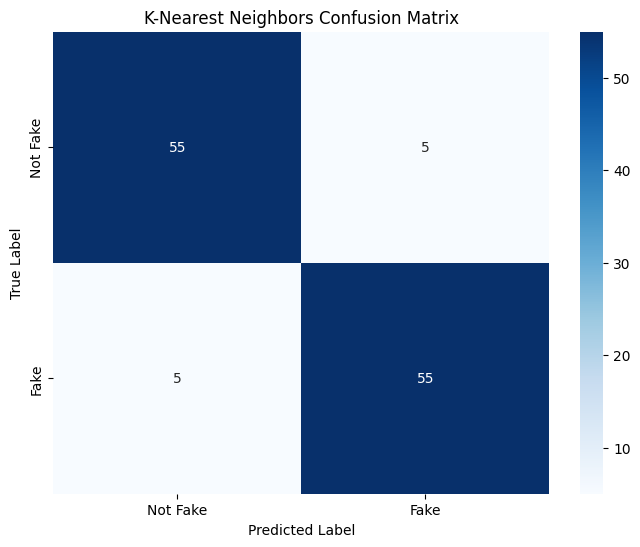


Support Vector Machine Confusion Matrix:
 [[56  4]
 [10 50]]
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        60
           1       0.93      0.83      0.88        60

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.89      0.88      0.88       120



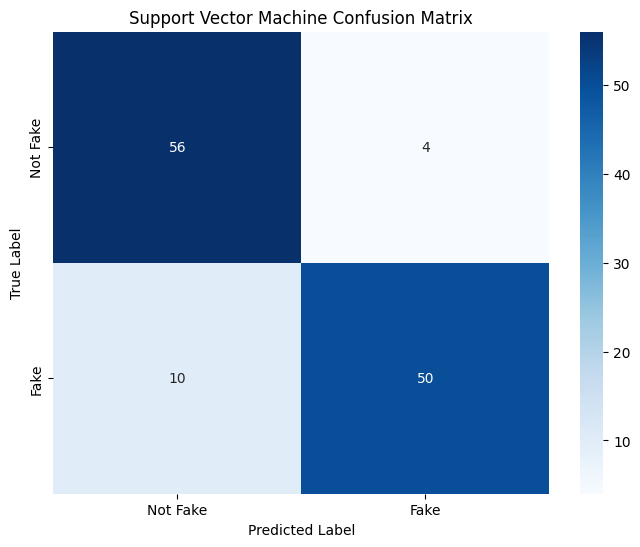


Decision Tree Classifier Confusion Matrix:
 [[53  7]
 [ 3 57]]
Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91        60
           1       0.89      0.95      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



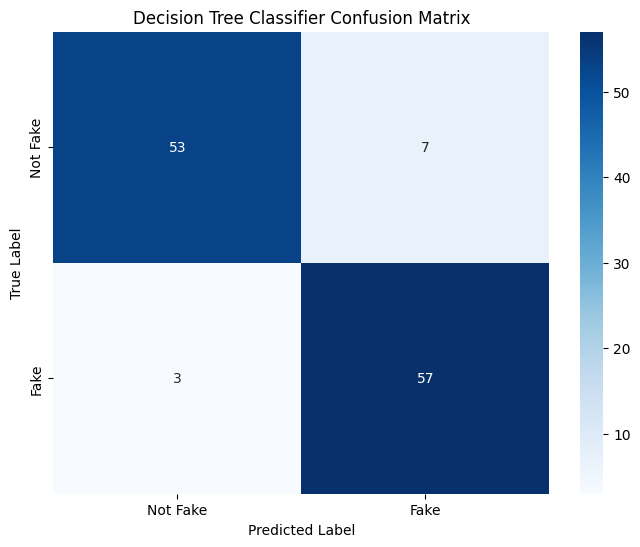


Random Forest Classifier Confusion Matrix:
 [[57  3]
 [ 4 56]]
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        60
           1       0.95      0.93      0.94        60

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



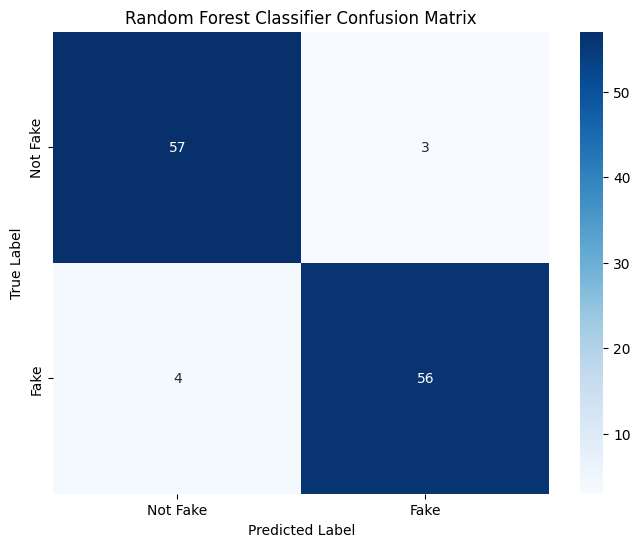

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import keras
from sklearn.preprocessing import StandardScaler , LabelEncoder
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Dropout


train_path = 'train.csv'
test_path = 'test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)


x_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values

x_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train_sc_pca = pca.fit_transform(x_train_sc)
x_test_sc_pca = pca.transform(x_test_sc)

# Logistic Regression
losreg = LogisticRegression(random_state = 7)
losreg.fit(x_train_sc_pca, y_train)
y_pred = losreg.predict(x_test_sc_pca)
cm = confusion_matrix(y_test, y_pred)
print("Logistic Regression Confusion Matrix:\n", cm)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2)
knn.fit(x_train_sc, y_train)
y_pred = knn.predict(x_test_sc)
cm = confusion_matrix(y_test, y_pred)
print("\nK-Nearest Neighbors Confusion Matrix:\n", cm)
print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

# Support Vector Machine
svc = SVC(kernel='rbf', random_state=5)
svc.fit(x_train_sc, y_train)
y_pred = svc.predict(x_test_sc)
cm = confusion_matrix(y_test, y_pred)
print("\nSupport Vector Machine Confusion Matrix:\n", cm)
print("Support Vector Machine Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

# Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc.fit(x_train_sc, y_train)
y_pred = dtc.predict(x_test_sc)
cm = confusion_matrix(y_test, y_pred)
print("\nDecision Tree Classifier Confusion Matrix:\n", cm)
print("Decision Tree Classifier Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=0)
rfc.fit(x_train_sc, y_train)
y_pred = rfc.predict(x_test_sc)
cm = confusion_matrix(y_test, y_pred)
print("\nRandom Forest Classifier Confusion Matrix:\n", cm)
print("Random Forest Classifier Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()


**FIELD TO CHECK ACCOUNT IS GENUINE OR NOT**

profile_pic = input('0 is no profile pic, 1 is profile pic is available : ')
num_by_num = input('ratio of number of numerical chars in username to its length : ')
full_name = input('full name in word tokens : ')
num_by_char = input('ratio of number of numerical characters in full name to its length : ')
name_username = input('are username and full name literally the same 0 : if not simillar and 1 : if simillar : ')
bio_len = input('bio length in characters : ')
url = input('has external URL or not 0 : dont have and 1 : have url : ')
private = input('0 : if not private , 1 : if private : ')
post = input('number of post : ')
followers = input('number of followers : ')
follows = input('number of follows : ')

In [ ]:
pred1 = rfc.predict(sc.transform([[0,0,2,0,0,22,1,1,18,1,1]])) > 0.5
#pred = rfc.predict(sc.transform([[profile_pic,num_by_num,full_name,num_by_char,name_username,bio_len,url,private,post,followers,follows]])) > 0.5
if pred1 == 0:
    print('0 : genuine account')
else:
    print('1 : Spam account')

1 : Spam account


***THIS IS FOR PRACTICE PURPOSE TO IMPROVISE MODEL OR TO INCREASE ACCURACY***

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1)
grid_search.fit(x_train_sc, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_dtc = grid_search.best_estimator_
y_pred = best_dtc.predict(x_test_sc)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy: 0.925


In [ ]:
rfc = RandomForestClassifier(n_estimators=11,   # You can change this value
                             criterion='entropy',  # You can also try 'gini'
                             max_depth=None,  # You can try different values or None
                             min_samples_split=2,  # You can try different values
                             min_samples_leaf=1,  # You can try different values
                             random_state=0)

rfc.fit(x_train_sc, y_train)
y_pred = rfc.predict(x_test_sc)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[57  3]
 [ 4 56]]


0.9416666666666667

In [ ]:
# Combination 1
rfc1 = RandomForestClassifier(n_estimators=11,
                              criterion='entropy',
                              max_depth=5,
                              min_samples_split=10,
                              min_samples_leaf=1,
                              random_state=0)

# Combination 2
rfc2 = RandomForestClassifier(n_estimators=11,
                              criterion='gini',
                              max_depth=15,
                              min_samples_split=2,
                              min_samples_leaf=4,
                              random_state=0)

# Combination 3
rfc3 = RandomForestClassifier(n_estimators=11,
                              criterion='entropy',
                              max_depth=20,
                              min_samples_split=5,
                              min_samples_leaf=2,
                              random_state=0)

# Combination 4
rfc4 = RandomForestClassifier(n_estimators=11,
                              criterion='gini',
                              max_depth=10,
                              min_samples_split=5,
                              min_samples_leaf=2,
                              random_state=0)

# Combination 5
rfc5 = RandomForestClassifier(n_estimators=11,
                              criterion='entropy',
                              max_depth=15,
                              min_samples_split=10,
                              min_samples_leaf=4,
                              random_state=0)

# Fitting and predicting for each combination
for i, rfc in enumerate([rfc1, rfc2, rfc3, rfc4, rfc5]):
    rfc.fit(x_train_sc, y_train)
    y_pred = rfc.predict(x_test_sc)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    print(f"Combination {i+1}:")
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", acc)
    print()


Combination 1:
Confusion Matrix:
[[55  5]
 [ 8 52]]
Accuracy: 0.8916666666666667

Combination 2:
Confusion Matrix:
[[56  4]
 [ 7 53]]
Accuracy: 0.9083333333333333

Combination 3:
Confusion Matrix:
[[54  6]
 [ 6 54]]
Accuracy: 0.9

Combination 4:
Confusion Matrix:
[[55  5]
 [ 6 54]]
Accuracy: 0.9083333333333333

Combination 5:
Confusion Matrix:
[[57  3]
 [ 8 52]]
Accuracy: 0.9083333333333333



In [ ]:
pred1 = rfc.predict(sc.transform([[0,0,2,0,0,22,1,1,18,1,1]])) > 0.5
#pred = rfc.predict(sc.transform([[profile_pic,num_by_num,full_name,num_by_char,name_username,bio_len,url,private,post,followers,follows]])) > 0.5
if pred1 == 0:
    print('0 : genuine account')
else:
    print('1 : Spam account')

1 : Spam account
